In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
N = 1001

In [7]:
data = []
with open("logpimd/log.lammps.0", "r") as f:
    for i in range(49):
        print(f.readline())
    for i in range(N):
        line = f.readline()
        data.append(line.split())
    for i in range(30):
        print(f.readline())

LAMMPS (24 Dec 2020)

Processor partition = 0

OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:94)

  using 1 OpenMP thread(s) per MPI task

units		electron

atom_style	atomic

atom_modify map yes

boundary	p p p



region mybox block -5.0 5.0 -5.0 5.0 -5.0 5.0

create_box 1 mybox

Created orthogonal box = (-5.0000000 -5.0000000 -5.0000000) to (5.0000000 5.0000000 5.0000000)

  1 by 1 by 1 MPI processor grid

create_atoms 1 single 0.0 0.0 0.0 units box

Created 1 atoms

  create_atoms CPU = 0.000 seconds

pair_style zero 2.0 nocoeff

pair_coeff * *

mass		1 1.0



timestep 1.0

fix 2 all spring/self 1.0 xyz

fix_modify 2 energy yes

velocity all set 0.1 0.1 0.1



fix 1 all pimd3 method nmpimd ensemble nvt thermostat PILE_G 975481 tau 10.0 temp 3.42



thermo_style custom step f_1[1] f_1[2] f_1[3] f_1[4] f_1[5] f_1[6] f_1[7] f_1[8] f_1[9]

thermo 100



run		1000000

Neighbor list info ...

  update every 1 steps, delay 10 steps, check yes

  max neighbors

In [8]:
data_array = np.array(data).astype("float")

In [9]:
steps = data_array[:, 0]
# tmp = data_array[:, 1]
KE = data_array[:, 1]
SE = data_array[:, 2]
PE = data_array[:, 3]
TE = data_array[:, 4]

t_prim = data_array[:, 5]
t_vir = data_array[:, 6]
t_cv = data_array[:, 7]
p_prim = data_array[:, 8]
p_cv = data_array[:, 9]

In [10]:
PE.mean()

6.549244964135864e-05

In [11]:
t_prim.mean()

6.498260495204794e-05

In [12]:
t_vir.mean()

6.549244964135864e-05

In [13]:
t_cv.mean()

6.503130973426574e-05

In [14]:
p_prim.mean()

-3.398964305084916e-10

In [15]:
p_cv.mean()

-9.222797747712287e-10

In [16]:
p_prim

array([ 8.4903969e-09, -4.4767201e-09, -1.1862703e-08, ...,
       -3.7963169e-08, -2.1363793e-09, -2.0698860e-09])

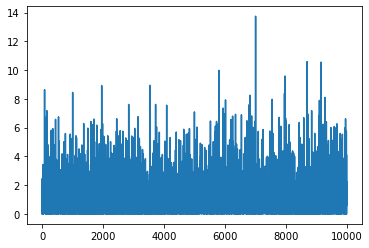

In [60]:
plt.plot(t_vir)

In [61]:
np.save("/Users/yifan/Work/pimd/lammpsPIMD/example/harmonic/task6", np.c_[t_prim, t_vir, t_cv, p_prim, p_cv])

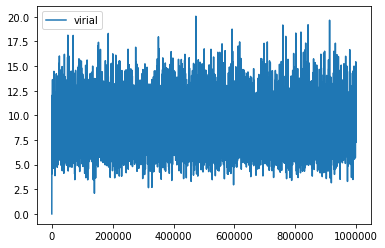

In [25]:
# plt.plot(steps, KE, label = "KE")
# plt.plot(steps, prim, label = "primitive")
plt.plot(steps, t_prim, label = "virial")
plt.legend()

In [17]:
def errbar(data):
    nsamp = 500
    nevery = int(data.shape[0] / nsamp)
    data_ = np.zeros(nsamp)
    for k in range(nsamp):
        data_[k] = data[k*nevery:(k+1)*nevery].mean()
    errbar_ = np.sqrt(data_.var()/(nsamp-1))
    return errbar_

In [19]:
t_prim_lmp_mean = t_prim[10::].mean()
t_vir_lmp_mean = t_vir[10::].mean()
t_cv_lmp_mean = t_cv[10::].mean()
p_prim_lmp_mean = p_prim[10::].mean()
p_cv_lmp_mean = p_cv[10::].mean()

In [18]:
tprim_lmperr = errbar(t_prim[10::])
tvir_lmperr = errbar(t_vir[10::])
tcv_lmperr = errbar(t_cv[10::])
pprim_lmperr = errbar(p_prim[10::])
pcv_lmperr = errbar(p_cv[10::])

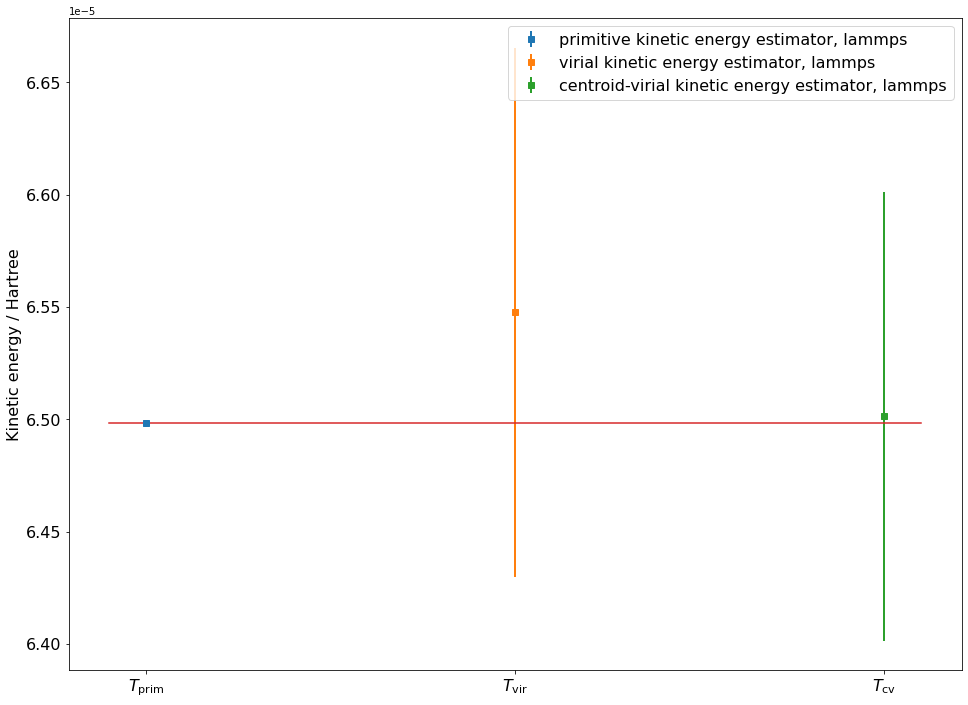

In [22]:
plt.figure(figsize = (16, 12))
plt.xticks([0, 1, 2], ["$T_{\mathrm{prim}}$", "$T_{\mathrm{vir}}$", "$T_{\mathrm{cv}}$"], fontsize = 16)
# plt.xticks([], [], fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Kinetic energy / Hartree", fontsize = 16)
# plt.errorbar(0, t_prim_mean, 1.0*tprimerr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive kinetic energy estimator, model code")
# plt.errorbar(1, t_cv_mean, 1.0*tcverr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial kinetic energy estimator, model code")
plt.errorbar(0, t_prim_lmp_mean, 1.0*tprim_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive kinetic energy estimator, lammps")
plt.errorbar(1, t_vir_lmp_mean, 1.0*tvir_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "virial kinetic energy estimator, lammps")
plt.errorbar(2, t_cv_lmp_mean, 1.0*tcv_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial kinetic energy estimator, lammps")
plt.legend(fontsize = 16)
# plt.text(0.2, 1.513, "Expectation of quantum kinetic energy: $<T>=1.502966$", fontsize = 16)
# plt.text(0.2, 1.523, "PIMD simulation of a harmonic oscillator with 4 beads, $\\beta=1.0$, $\omega=1.0$", fontsize = 16)
# plt.text(0.16, 1.52, "Average of 3 kinetic energy estimators in $NVT$ ensemble using PILE$\_$L thermostat", fontsize = 16)
# plt.annotate("", xy=(0.19, 1.504), xytext=(0.22, 1.513),arrowprops=dict(arrowstyle="<-"))
plt.plot(np.linspace(-0.1, 2.1, 10), 6.498216e-05*np.ones(10))